*Parts of this notebook are based on notebooks provided with the book: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the original content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

<font color = emerald>Jessica Reyes<font>

In [13]:
import numpy as np


# NumPy Exercises:  Boolean masks and aggregations

### Exercise 1

Write a command that replaces all NaN values with 0 in the following array.  Use [np.isnan](https://numpy.org/doc/stable/reference/generated/numpy.isnan.html) with Boolean indexing.

In [2]:
a = np.array([1,2,3,np.nan,5,6,7,np.nan])

In [3]:
# replace all occurrences of NaN with 0
# use np.isnan
replace_with_zero = np.zeros(len(a))
np.nan_to_num(a, copy=False, nan=replace_with_zero)

array([1., 2., 3., 0., 5., 6., 7., 0.])

Sometimes we just want to get rid of NaN values.  Write a command that creates a new array that contains only the non-NaN values from the array.

In [4]:
a = np.array([1,2,3,np.nan,5,6,7,np.nan])
# new array that contains only the non-NaN values
non_nan_a = a[~np.isnan(a)]
non_nan_a

array([1., 2., 3., 5., 6., 7.])

### Exercise 2

* Create an array of size $5 \times 6$ with random values between 0 and 1 and find the minimum and maximum values in the entire array, and in each column / row.

In [14]:
array_5_6 = np.random.rand(5,6)
print(array_5_6)
#minimum value of entire array
print('Minimum value of entire array:')
print(np.min(array_5_6))
#maximum value of entire array
print('Maximum value of entire array: ')
print(np.max(array_5_6))
#mimimum value of each column
print('Minimum value of each column: ')
print(np.min(array_5_6, axis=0))
#maximum value of each column
print('Maximum value of each column: ')
print(np.max(array_5_6, axis=0))
#minimum value in each row
print('Minimum value of each row: ')
print(np.min(array_5_6, axis=1))
#maximum value in each row
print('Maximum value of each row: ')
print(np.max(array_5_6, axis=1))

[[0.22870248 0.20926104 0.25086589 0.11620476 0.39818995 0.09064691]
 [0.0680346  0.97303801 0.72142749 0.67495123 0.44786535 0.32909559]
 [0.29730294 0.37601069 0.41402517 0.59621741 0.65898473 0.22879349]
 [0.83767558 0.83134902 0.56966889 0.55745223 0.40552952 0.45381632]
 [0.78445702 0.08757087 0.45573317 0.17259158 0.10062271 0.32620505]]
Minimum value of entire array:
0.0680346012020493
Maximum value of entire array: 
0.9730380066709995
Minimum value of each column: 
[0.0680346  0.08757087 0.25086589 0.11620476 0.10062271 0.09064691]
Maximum value of each column: 
[0.83767558 0.97303801 0.72142749 0.67495123 0.65898473 0.45381632]
Minimum value of each row: 
[0.09064691 0.0680346  0.22879349 0.40552952 0.08757087]
Maximum value of each row: 
[0.39818995 0.97303801 0.65898473 0.83767558 0.78445702]


### Exercise 3

As another example of using NumPy for machine learning computations, we will compute the accuracy of a classifier.  Here you are given vectors $y$ and $\hat{y}$, where $y=(y_1,\ldots,y_N)$ are the given labels and $\hat{y} = (\hat{y}_1,\ldots,\hat{y}_N)$ are the predicted labels.  Both $y$ and $\hat{y}$ are vectors of integers.

Mathematically accuracy is expressed as:
$$
\mathrm{accuracy} = \frac{1}{N}\sum_{i=1}^N \left[\hat{y}_i = y_i\right].
$$
Here the notation $[\mathrm{condition}]$ is the [Iverson bracket](https://en.wikipedia.org/wiki/Iverson_bracket), which is equal to 1 if the condition is true, and 0 otherwise.  What this does, is count the fraction of times $y_i$ is equal to $\hat{y}_i$.
Also note that the equality sign in this formula corresponds to the programming `==` operator.

In [15]:
y = np.array([0, 1, 1, 1, 0])
y_pred = np.array([1, 0, 1, 1, 0])
# accuracy = ...
accuracy = np.mean(y==y_pred)
print(accuracy)

0.6


For your reference here is a pure Python implementation:

In [16]:
accuracy = sum([ y[i]==y_pred[i] for i in range(len(y)) ]) / len(y)
accuracy

0.6

### Exercise 4:  Rainfall in Seattle

Contrary to popular belief, Seattle is not as rainy as you would think.  To see what the data says, we will load a dataset containing data on one year's rainfall.  Like many of the datasets we will look at in this course, the data is in a CSV file.  NumPy provides us a method for reading such files using [np.genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html).
The information we are interested in is contained in the fourth column of the dataset, so we will read only that column.  Another nice feature of `genfromtxt`, is that the file doesn't have to be stored on your machine, and can be read directly from a CSV file stored somewhere on the internet.

In [17]:
# genfromtxt reads delimited files
# the default delimiter is space, so we need to explicitly tell it to use
# comma as the delimiter
# the precipitation data is in the fourth column of the CSV file
# the file has a header row which we want to skip

url = 'https://github.com/jakevdp/PythonDataScienceHandbook/raw/master/notebooks_v1/data/Seattle2014.csv'
rainfall = np.genfromtxt(url, delimiter=',', skip_header=1, usecols=3)
rainfall.shape, rainfall.dtype

((365,), dtype('float64'))

The array contains 365 values, giving daily rainfall in mm from January 1 to December 31, 2014.

As a first quick visualization, let's look at the histogram of rainfall using Matplotlib:

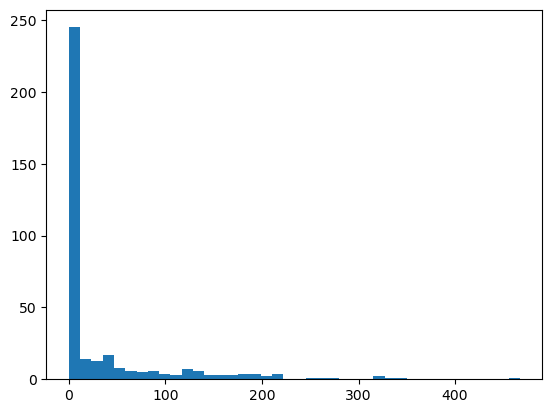

In [18]:
import matplotlib.pyplot as plt
plt.hist(rainfall,40);

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw zero or close to zero rainfall in 2014. In the following exercises you will answer more detailed questions about the data.

In the following exercises use array Boolean operations (and refrain from using for loops!) to determine the following:

* To confirm our observation from the histogram, how many days had zero rainfall?

In [19]:
zero_rainfall_days = np.sum(rainfall==0)
print(zero_rainfall_days)

215


* How many days had rainfall of between 10mm and 200mm?  (FYI there are 254 mm in an inch). 

In [20]:
rainfall_10_200 = np.sum(rainfall>10) & np.sum(rainfall<200)
print(rainfall_10_200)

88


* How many days with rain had strictly less than 10mm of rain?

In [21]:
less_than_10 = np.sum(rainfall<10)
print(less_than_10)

242


* What was the average precipitation on rainy days?  (Use `np.mean` to compute the average).

In [22]:
avg_rainfall = np.mean(rainfall)
print(round(avg_rainfall,2))

33.78


* What was the average precipitation on summer rainy days (i.e. summer days that had rain)?  We'll count summer as going from June 21st which is the 172nd day of the year until (and including), day 262 of the year.  

In [23]:
summer_rainfall = rainfall[172:263]
avg_summer_rainfall = np.mean(summer_rainfall)
print(round(avg_summer_rainfall,2))

8.08
